In [1]:
!pip install nltk
!pip install kss
!pip install wordcloud
!pip install konlpy

폰트 설치

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [4]:
#한국어 전처리
import konlpy
konlpy.__version__

'0.5.2'

In [5]:
#영어 전처리
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# 형태소 : 형태소 분석으로 문장의 단어를 분할 / noun, verb, adj
from konlpy.tag import Okt

In [7]:
df = pd.read_csv('covid_total.csv', encoding = 'utf-8')
df.head()

,Unnamed: 0,날짜,제목,내용,작성자
0,0,2021.02.15.,[스위스 코로나] 2월말 이후... 대규모 테스트로 정책 변경,2월 24일로 미루어진 스위스 봉쇄완화정책 스위스에서는 지난 해 12월 18일부터 ...,스위스에서의 일상 블로그
1,1,2021.02.19.,금융당국과 정책금융기관은 상호 협력 하에 코로나發 위기...,한국판 뉴딜·혁신금융 등을 통한 미래혁신 대비 □ 정책금융기관장들은 코로나19 지원...,금융위원회 공식 블로그
2,2,2021.02.16.,코로나 방역정책 잘하는중? 사회적 거리두기 단계 별 방역수칙,하지만 사회적 거리두기 라는 코로나 방역정책은 잘하고 있는 것이 맞을까? 코로나 단...,푸블의 대전맛집
3,3,2021.02.19.,[수인재두뇌과학]코로나19 대응 교육부 정책 한눈에 보기!,"이번 포스팅에서는, 지난 1월 발표한 2021년 교육부의 코로나 19 대응과제 & ...",수인재두뇌과학
4,4,2021.02.15.,코로나19와 ‘교육 없는 교육’ 정책 -조영달(서울대 교수)-,코로나에 뒷북만 치는 교육 정책. ‘교육 마비’ 해결 학교에 떠넘겨 위험에 방비하는...,edu9508(국어공부) 도우미


In [8]:
df.columns

Index(['Unnamed: 0', '날짜', '제목', '내용', '작성자'], dtype='object')

In [9]:
twitter = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


##단어 리스트 만들기

In [10]:
word_list = []
word_list =df['제목']

##형태소 분리

In [11]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('이낙연', 'Noun'), ('"', 'Punctuation'), ('자영', 'Noun'), ('업자', 'Noun'), ('피해', 'Noun'), ('눈덩이', 'Noun'), (',', 'Punctuation'), ('사회', 'Noun'), ('적', 'Suffix'), ('거리', 'Noun'), ('두기', 'Noun'), ('단계', 'Noun'), ('적', 'Suffix'), ('완화', 'Noun'), ('...', 'Punctuation')]


In [12]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in['Noun']:
      noun_list.append(word)

두 단어 이상만 추출

In [13]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

['스위스',
 '코로나',
 '이후',
 '대규모',
 '테스트',
 '정책',
 '변경',
 '금융',
 '당국',
 '정책금융',
 '기관',
 '상호',
 '협력',
 '코로나',
 '위기',
 '코로나',
 '방역',
 '정책',
 '사회',
 '거리',
 '두기',
 '단계',
 '방역',
 '인재',
 '두뇌',
 '과학',
 '코로나',
 '대응',
 '교육부',
 '정책',
 '한눈',
 '보기',
 '코로나',
 '교육',
 '교육',
 '정책',
 '서울대',
 '교수',
 '섬서성',
 '서안',
 '코로나',
 '최신',
 '격리',
 '정책',
 '약속',
 '남발',
 '정부',
 '코로나',
 '백신',
 '정책',
 '공항',
 '코로나',
 '검사',
 '호텔',
 '격리',
 '의무',
 '정책',
 '일본',
 '이민',
 '정책',
 '코로나',
 '문제',
 '종식',
 '후의',
 '일본',
 '기본',
 '방향',
 '올해',
 '사업',
 '공개',
 '포스트',
 '코로나',
 '문화',
 '예술',
 '정책',
 '변화',
 '범어역',
 '범어',
 '도서관',
 '운영',
 '시간',
 '정보',
 '코로나',
 '운영',
 '정책',
 '경기도',
 '정책',
 '자금',
 '대출',
 '코로나',
 '복합',
 '민족',
 '코로나',
 '가족',
 '만남',
 '수혈',
 '지혈',
 '정책',
 '올해',
 '정책',
 '코로나',
 '대응',
 '올인',
 '제도',
 '뒷받침',
 '필요',
 '코로나',
 '대출',
 '만기',
 '연장',
 '성수',
 '정책금융',
 '기관',
 '목소리',
 '성수',
 '정책금융',
 '기관',
 '코로나',
 '대출',
 '만기',
 '연장',
 '공감',
 '코로나',
 '무한',
 '재정정책',
 '결말',
 '신종',
 '코로나바이러스',
 '감염증',
 '정부',
 '거리',
 '두기',
 '정책',
 '추천',
 '전세계',
 '코로나',
 '셧

단어카운트

In [14]:

#카운트
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('코로나', 55018),
 ('정책', 27233),
 ('지원', 4981),
 ('백신', 3998),
 ('경제', 3750),
 ('시대', 3722),
 ('정부', 3664),
 ('포스트', 3268),
 ('이후', 3182),
 ('대응', 2921),
 ('자금', 2826),
 ('관련', 2669),
 ('청년', 2507),
 ('부동산', 2326),
 ('극복', 2321),
 ('한국', 2320),
 ('뉴스', 2311),
 ('미국', 2294),
 ('원금', 2142),
 ('확산', 2016),
 ('방역', 2001),
 ('교육', 1997),
 ('공인', 1971),
 ('소상', 1923),
 ('위기', 1917),
 ('세계', 1906),
 ('사회', 1624),
 ('중국', 1601),
 ('국민', 1565),
 ('접종', 1547),
 ('진자', 1504),
 ('개최', 1417),
 ('현황', 1396),
 ('시장', 1357),
 ('기업', 1348),
 ('대책', 1336),
 ('피해', 1329),
 ('바이러스', 1312),
 ('대출', 1251),
 ('사업', 1245),
 ('재난', 1229),
 ('뉴딜', 1229),
 ('신청', 1227),
 ('전망', 1202),
 ('긴급', 1195),
 ('변화', 1192),
 ('미래', 1184),
 ('안내', 1182),
 ('산업', 1174),
 ('신종', 1169),
 ('지역', 1155),
 ('투자', 1111),
 ('코로나바이러스', 1096),
 ('상황', 1063),
 ('고용', 1030),
 ('사태', 1028),
 ('중소기업', 1020),
 ('복지', 1017),
 ('방법', 959),
 ('온라인', 950),
 ('일본', 938),
 ('방향', 928),
 ('일자리', 926),
 ('단계', 921),
 ('정보', 920),
 ('발표', 916),
 (

워드클라우드 & 불용어


{'코로나': 55018, '정책': 27233, '지원': 4981, '백신': 3998, '경제': 3750, '시대': 3722, '정부': 3664, '포스트': 3268, '이후': 3182, '대응': 2921, '자금': 2826, '관련': 2669, '청년': 2507, '부동산': 2326, '극복': 2321, '한국': 2320, '뉴스': 2311, '미국': 2294, '원금': 2142, '확산': 2016, '방역': 2001, '교육': 1997, '공인': 1971, '소상': 1923, '위기': 1917, '세계': 1906, '사회': 1624, '중국': 1601, '국민': 1565, '접종': 1547, '진자': 1504, '개최': 1417, '현황': 1396, '시장': 1357, '기업': 1348, '대책': 1336, '피해': 1329, '바이러스': 1312, '대출': 1251, '사업': 1245, '재난': 1229, '뉴딜': 1229, '신청': 1227, '전망': 1202, '긴급': 1195, '변화': 1192, '미래': 1184, '안내': 1182, '산업': 1174, '신종': 1169, '지역': 1155, '투자': 1111, '코로나바이러스': 1096, '상황': 1063, '고용': 1030, '사태': 1028, '중소기업': 1020, '복지': 1017, '방법': 959, '온라인': 950, '일본': 938, '방향': 928, '일자리': 926, '단계': 921, '정보': 920, '발표': 916, '경기': 914, '서울': 903, '대한': 883, '정리': 874, '금융': 861, '영향': 859, '브리핑': 856, '포럼': 853, '생활': 850, '바이든': 845, '토론회': 839, '거리': 829, '전략': 818, '의원': 816, '경기도': 808, '국가': 807, '소식': 807, '동향': 80

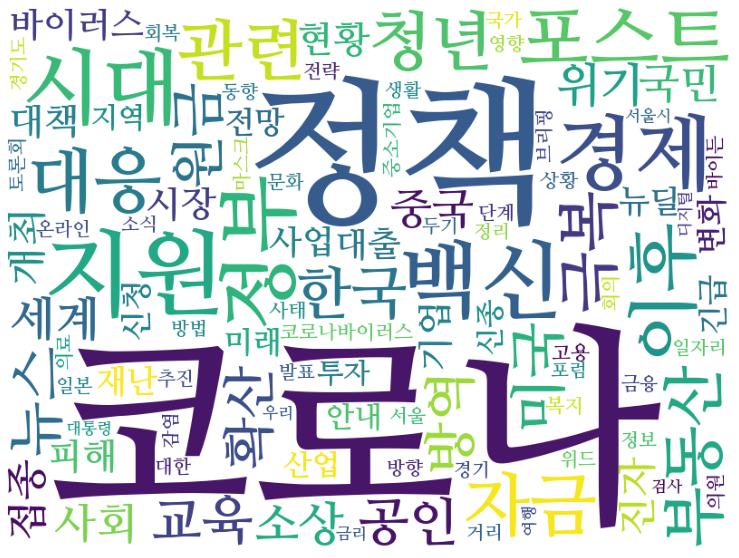

In [16]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud

STOPWORDS = {'코로나', '정책'}

#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = STOPWORDS,
                      background_color='white',
                      width=800,
                      height=600)

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [18]:
STOPWORDS

{'정책', '코로나'}